In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from models.clstm import cLSTM, train_model_ista, train_model_adam

In [11]:
device = torch.device('cuda')
## data
import pandas as pd
df = pd.read_csv('C:/Users/chanyoung/Desktop/TCDF-master/data/gang_csv.csv')
df =df.drop('1210030000',axis = 1)

In [12]:
df_morning = df.loc[1560:1571]
df_np = df_morning.values
X = torch.tensor(df_np[np.newaxis], dtype=torch.float32, device=device)

## SETUP model

In [13]:
clstm = cLSTM(X.shape[-1], hidden=2).cuda(device=device)

In [14]:
train_loss_adam = train_model_adam(
    clstm, X, context=1, lam=10.0, lam_ridge=1e-2, lr=1e-3, max_iter=10000,
    check_every=50)

----------Iter = 50----------
Loss = 1013.030396
----------Iter = 100----------
Loss = 944.446594
----------Iter = 150----------
Loss = 878.433167
----------Iter = 200----------
Loss = 814.610229
----------Iter = 250----------
Loss = 753.012817
----------Iter = 300----------
Loss = 693.578857
----------Iter = 350----------
Loss = 636.232483
----------Iter = 400----------
Loss = 580.588501
----------Iter = 450----------
Loss = 528.214539
----------Iter = 500----------
Loss = 479.219788
----------Iter = 550----------
Loss = 435.775299
----------Iter = 600----------
Loss = 401.554871
----------Iter = 650----------
Loss = 382.846619
----------Iter = 700----------
Loss = 374.663239
----------Iter = 750----------
Loss = 367.866608
----------Iter = 800----------
Loss = 361.787842
----------Iter = 850----------
Loss = 356.071960
----------Iter = 900----------
Loss = 350.613068
----------Iter = 950----------
Loss = 345.368500
----------Iter = 1000----------
Loss = 340.310577
----------Iter = 10

----------Iter = 8350----------
Loss = 22.023382
----------Iter = 8400----------
Loss = 21.485022
----------Iter = 8450----------
Loss = 20.958380
----------Iter = 8500----------
Loss = 20.445730
----------Iter = 8550----------
Loss = 19.946880
----------Iter = 8600----------
Loss = 19.460075
----------Iter = 8650----------
Loss = 18.983828
----------Iter = 8700----------
Loss = 18.522020
----------Iter = 8750----------
Loss = 18.074074
----------Iter = 8800----------
Loss = 17.634926
----------Iter = 8850----------
Loss = 17.205599
----------Iter = 8900----------
Loss = 16.791111
----------Iter = 8950----------
Loss = 16.387995
----------Iter = 9000----------
Loss = 15.993954
----------Iter = 9050----------
Loss = 15.612322
----------Iter = 9100----------
Loss = 15.240195
----------Iter = 9150----------
Loss = 14.880246
----------Iter = 9200----------
Loss = 14.530837
----------Iter = 9250----------
Loss = 14.189240
----------Iter = 9300----------
Loss = 13.858773
----------Iter = 935

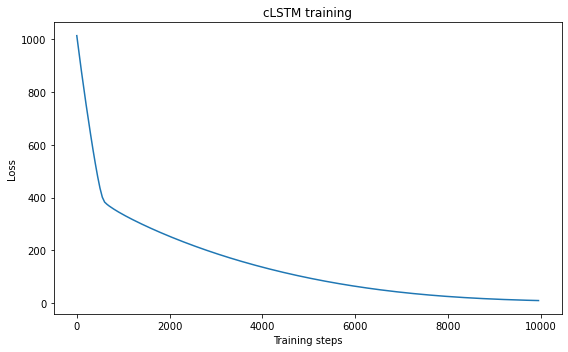

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(50 * np.arange(len(train_loss_adam)), train_loss_adam)
plt.title('cLSTM training')
plt.ylabel('Loss')
plt.xlabel('Training steps')
plt.tight_layout()
plt.show()

Estimated variable usage = 100.00%


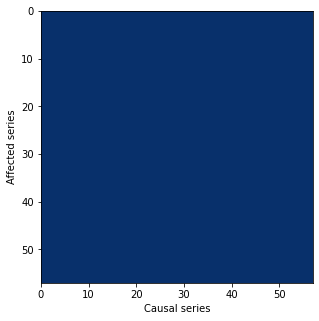

In [17]:
GC_est= clstm.GC().cpu().data.numpy()
fig, axarr = plt.subplots( figsize=(10, 5))
axarr.imshow(GC_est, cmap='Blues', vmin=0, vmax=1, extent=(0, len(GC_est), len(GC_est), 0))
axarr.set_ylabel('Affected series')
axarr.set_xlabel('Causal series')
print('Estimated variable usage = %.2f%%' % (100 * np.mean(GC_est)))

In [18]:
GC_est

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])